In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
from wordcloud import WordCloud
nltk.download()



showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [104]:
tweet_data=pd.read_csv('tweets.csv')
tweet_data

,Unnamed: 0,user_name,user_location,user_description,user_verified,date,text,hashtags,source
0,0,Best MR Deals,Kolkata,I tweet deals that may contain affiliate links...,False,2022-09-14 05:04:55+00:00,Black Peep Toe Stilettos Platform High Heel An...,"['tinstree', 'deal']",Twitter Web App
1,1,Best MR Deals,Kolkata,I tweet deals that may contain affiliate links...,False,2022-09-14 05:04:27+00:00,‼️V Notched Tie Side Longline Shirt - Black M‼...,['Accessories'],Twitter Web App
2,2,BreeoniVlogs,"Villa Rica, GA","Hi,I'm Breeoni And I enjoy going out to shop a...",False,2022-09-14 05:04:25+00:00,Went to good ol' Burger king with my dad ... 😲...,"['vlog', 'vlogger', 'vloggers', 'vlogs', 'vlog...",Twitter for Android
3,3,Ijaz Jewelers,NaN,Ijaz Jewelers is a trendy jewelry spot. We cre...,False,2022-09-14 05:04:17+00:00,Fine Quality Gold Nugget Rings by Ijaz Jeweler...,"['goldjewellery', 'diamondjewellery']",Twitter Web App
4,4,www.amora-shopping.com,London,https://t.co/VvmCU1nz1Z is online women's clot...,False,2022-09-14 05:03:57+00:00,What are you wearing tomorrow ? Feeling Tasty!...,"['style', 'fashiongram', 'fashionable']",Revive Social App
...,...,...,...,...,...,...,...,...,...
997,995,lydiasingletonspiritualteacher,NaN,Spiritual Teacher,False,2022-09-14 03:31:09+00:00,So good I had to share! Check out all the item...,"['poshmark', 'fashion']",Poshmark
998,996,Lone the Throwdown Cat,"San Diego, CA",I have am a 14 year old fighting Pancreatitis....,False,2022-09-14 03:31:09+00:00,So good I had to share! Check out all the item...,"['poshmark', 'fashion']",Poshmark
999,997,Red’s Revivals,NaN,NaN,False,2022-09-14 03:31:09+00:00,So good I had to share! Check out all the item...,"['poshmark', 'fashion', 'style', 'shopmycloset']",Poshmark
1000,998,Reenie F,"Fort Lauderdale, FL",Mother.Entrepreneur.PoshAmbassador. #Ibleedblu...,False,2022-09-14 03:31:07+00:00,So good I had to share! Check out all the item...,"['poshmark', 'fashion']",Poshmark


In [105]:
tweet_data = tweet_data[['text']]
tweet_data = tweet_data.astype(str)

tweet_data

,text
0,Black Peep Toe Stilettos Platform High Heel An...
1,‼️V Notched Tie Side Longline Shirt - Black M‼...
2,Went to good ol' Burger king with my dad ... 😲...
3,Fine Quality Gold Nugget Rings by Ijaz Jeweler...
4,What are you wearing tomorrow ? Feeling Tasty!...
...,...
997,So good I had to share! Check out all the item...
998,So good I had to share! Check out all the item...
999,So good I had to share! Check out all the item...
1000,So good I had to share! Check out all the item...


In [106]:
string.punctuation


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [107]:
# Remove https

def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

tweet_data['text'] = tweet_data['text'].apply(lambda x : remove_url(x))

tweet_data


,text
0,Black Peep Toe Stilettos Platform High Heel An...
1,‼️V Notched Tie Side Longline Shirt - Black M‼...
2,Went to good ol' Burger king with my dad ... 😲...
3,Fine Quality Gold Nugget Rings by Ijaz Jeweler...
4,What are you wearing tomorrow ? Feeling Tasty!...
...,...
997,So good I had to share! Check out all the item...
998,So good I had to share! Check out all the item...
999,So good I had to share! Check out all the item...
1000,So good I had to share! Check out all the item...


In [108]:
# Remove punctuation

tweet_data['clean_text'] = tweet_data['text'].str.replace('[^\w\s]','')
tweet_data.head()


/var/folders/q0/hps99sh511n627gdy32s4wlh0000gn/T/ipykernel_37505/353859958.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  tweet_data['clean_text'] = tweet_data['text'].str.replace('[^\w\s]','')


,text,clean_text
0,Black Peep Toe Stilettos Platform High Heel An...,Black Peep Toe Stilettos Platform High Heel An...
1,‼️V Notched Tie Side Longline Shirt - Black M‼...,V Notched Tie Side Longline Shirt Black M\n\n...
2,Went to good ol' Burger king with my dad ... 😲...,Went to good ol Burger king with my dad vlog...
3,Fine Quality Gold Nugget Rings by Ijaz Jeweler...,Fine Quality Gold Nugget Rings by Ijaz Jeweler...
4,What are you wearing tomorrow ? Feeling Tasty!...,What are you wearing tomorrow Feeling Tasty M...


In [109]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

tweet_data['Tweet_tokenized'] = tweet_data['clean_text'].apply(lambda x: tokenization(x.lower()))
tweet_data.head()

,text,clean_text,Tweet_tokenized
0,Black Peep Toe Stilettos Platform High Heel An...,Black Peep Toe Stilettos Platform High Heel An...,"[black, peep, toe, stilettos, platform, high, ..."
1,‼️V Notched Tie Side Longline Shirt - Black M‼...,V Notched Tie Side Longline Shirt Black M\n\n...,"[v, notched, tie, side, longline, shirt, black..."
2,Went to good ol' Burger king with my dad ... 😲...,Went to good ol Burger king with my dad vlog...,"[went, to, good, ol, burger, king, with, my, d..."
3,Fine Quality Gold Nugget Rings by Ijaz Jeweler...,Fine Quality Gold Nugget Rings by Ijaz Jeweler...,"[fine, quality, gold, nugget, rings, by, ijaz,..."
4,What are you wearing tomorrow ? Feeling Tasty!...,What are you wearing tomorrow Feeling Tasty M...,"[what, are, you, wearing, tomorrow, feeling, t..."


In [110]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aanchaldusija/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [111]:
def remove_stopwords(text):
    text = [word for word in text if word not in stopwords]
    return text
    
tweet_data['Tweet_without_stop'] = tweet_data['Tweet_tokenized'].apply(lambda x: remove_stopwords(x))
tweet_data.head(5)

,text,clean_text,Tweet_tokenized,Tweet_without_stop
0,Black Peep Toe Stilettos Platform High Heel An...,Black Peep Toe Stilettos Platform High Heel An...,"[black, peep, toe, stilettos, platform, high, ...","[black, peep, toe, stilettos, platform, high, ..."
1,‼️V Notched Tie Side Longline Shirt - Black M‼...,V Notched Tie Side Longline Shirt Black M\n\n...,"[v, notched, tie, side, longline, shirt, black...","[v, notched, tie, side, longline, shirt, black..."
2,Went to good ol' Burger king with my dad ... 😲...,Went to good ol Burger king with my dad vlog...,"[went, to, good, ol, burger, king, with, my, d...","[went, good, ol, burger, king, dad, vlog, vlog..."
3,Fine Quality Gold Nugget Rings by Ijaz Jeweler...,Fine Quality Gold Nugget Rings by Ijaz Jeweler...,"[fine, quality, gold, nugget, rings, by, ijaz,...","[fine, quality, gold, nugget, rings, ijaz, jew..."
4,What are you wearing tomorrow ? Feeling Tasty!...,What are you wearing tomorrow Feeling Tasty M...,"[what, are, you, wearing, tomorrow, feeling, t...","[wearing, tomorrow, feeling, tasty, mwah, styl..."


In [112]:
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tweet_data['Tweet_stemmed'] = tweet_data['Tweet_without_stop'].apply(lambda x: stemming(x))
tweet_data.head()

,text,clean_text,Tweet_tokenized,Tweet_without_stop,Tweet_stemmed
0,Black Peep Toe Stilettos Platform High Heel An...,Black Peep Toe Stilettos Platform High Heel An...,"[black, peep, toe, stilettos, platform, high, ...","[black, peep, toe, stilettos, platform, high, ...","[black, peep, toe, stiletto, platform, high, h..."
1,‼️V Notched Tie Side Longline Shirt - Black M‼...,V Notched Tie Side Longline Shirt Black M\n\n...,"[v, notched, tie, side, longline, shirt, black...","[v, notched, tie, side, longline, shirt, black...","[v, notch, tie, side, longlin, shirt, black, p..."
2,Went to good ol' Burger king with my dad ... 😲...,Went to good ol Burger king with my dad vlog...,"[went, to, good, ol, burger, king, with, my, d...","[went, good, ol, burger, king, dad, vlog, vlog...","[went, good, ol, burger, king, dad, vlog, vlog..."
3,Fine Quality Gold Nugget Rings by Ijaz Jeweler...,Fine Quality Gold Nugget Rings by Ijaz Jeweler...,"[fine, quality, gold, nugget, rings, by, ijaz,...","[fine, quality, gold, nugget, rings, ijaz, jew...","[fine, qualiti, gold, nugget, ring, ijaz, jewe..."
4,What are you wearing tomorrow ? Feeling Tasty!...,What are you wearing tomorrow Feeling Tasty M...,"[what, are, you, wearing, tomorrow, feeling, t...","[wearing, tomorrow, feeling, tasty, mwah, styl...","[wear, tomorrow, feel, tasti, mwah, style, fas..."


In [113]:
nltk.download('wordnet')
wordnet = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wordnet.lemmatize(word) for word in text]
    return text

tweet_data['Tweet_lemmatized'] = tweet_data['Tweet_without_stop'].apply(lambda x: lemmatizer(x))
tweet_data.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/aanchaldusija/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,text,clean_text,Tweet_tokenized,Tweet_without_stop,Tweet_stemmed,Tweet_lemmatized
0,Black Peep Toe Stilettos Platform High Heel An...,Black Peep Toe Stilettos Platform High Heel An...,"[black, peep, toe, stilettos, platform, high, ...","[black, peep, toe, stilettos, platform, high, ...","[black, peep, toe, stiletto, platform, high, h...","[black, peep, toe, stiletto, platform, high, h..."
1,‼️V Notched Tie Side Longline Shirt - Black M‼...,V Notched Tie Side Longline Shirt Black M\n\n...,"[v, notched, tie, side, longline, shirt, black...","[v, notched, tie, side, longline, shirt, black...","[v, notch, tie, side, longlin, shirt, black, p...","[v, notched, tie, side, longline, shirt, black..."
2,Went to good ol' Burger king with my dad ... 😲...,Went to good ol Burger king with my dad vlog...,"[went, to, good, ol, burger, king, with, my, d...","[went, good, ol, burger, king, dad, vlog, vlog...","[went, good, ol, burger, king, dad, vlog, vlog...","[went, good, ol, burger, king, dad, vlog, vlog..."
3,Fine Quality Gold Nugget Rings by Ijaz Jeweler...,Fine Quality Gold Nugget Rings by Ijaz Jeweler...,"[fine, quality, gold, nugget, rings, by, ijaz,...","[fine, quality, gold, nugget, rings, ijaz, jew...","[fine, qualiti, gold, nugget, ring, ijaz, jewe...","[fine, quality, gold, nugget, ring, ijaz, jewe..."
4,What are you wearing tomorrow ? Feeling Tasty!...,What are you wearing tomorrow Feeling Tasty M...,"[what, are, you, wearing, tomorrow, feeling, t...","[wearing, tomorrow, feeling, tasty, mwah, styl...","[wear, tomorrow, feel, tasti, mwah, style, fas...","[wearing, tomorrow, feeling, tasty, mwah, styl..."


In [114]:
all_clean_words=[]

for i in tweet_data['Tweet_lemmatized']:
    for j in i:
        all_clean_words.append(j)

all_clean_words=list(set(all_clean_words)) #removes duplicate values from the list

clean_words_str=' '.join(all_clean_words)

In [115]:
from random import sample
clean_tweets=list(set(tweet_data['clean_text']))
sample=sample(clean_tweets,20)

In [116]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample)
vectorizer.get_feature_names()


/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['14486',
 '1980',
 '2480',
 'adriannapapell',
 'ahotstores',
 'all',
 'altardstate',
 'amp',
 'and',
 'anthropologie',
 'are',
 'bag',
 'be',
 'beautiful',
 'bloom',
 'bloomchic',
 'boyntonbargains',
 'bucket',
 'button',
 'buy1_best',
 'byby',
 'bylandandsea',
 'calvinkleinjeans',
 'carters',
 'chain',
 'check',
 'chicos',
 'cold',
 'dance',
 'deals',
 'disney',
 'dnacloset1',
 'dress',
 'ericjavits',
 'espresso',
 'fashion',
 'fashionable',
 'fashionblogger',
 'fashiongirl',
 'fashiongram',
 'fashionista',
 'fashionlover',
 'fashionnova',
 'fashionstyle',
 'fashionweek',
 'feeling',
 'floral',
 'for',
 'from',
 'girl',
 'glamorous',
 'goldtone',
 'good',
 'had',
 'hestia',
 'im',
 'instafashion',
 'instagood',
 'items',
 'jordan',
 'josephribkoff',
 'juicycouture',
 'justfab',
 'kensie',
 'kors',
 'lifestyle',
 'like',
 'lively',
 'llbean',
 'looking',
 'love',
 'loving',
 'mart0015',
 'matric',
 'matricdance',
 'maxi',
 'michael',
 'midnightsoasis',
 'missavenue',
 'missme',
 'mitr

In [117]:
count_vect_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
count_vect_df.head()


,14486,1980,2480,adriannapapell,ahotstores,all,altardstate,amp,and,anthropologie,...,weekend,what,willismith,with,womens,wrap,yde,ydetweets,you,your
0,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [118]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(clean_words_str)

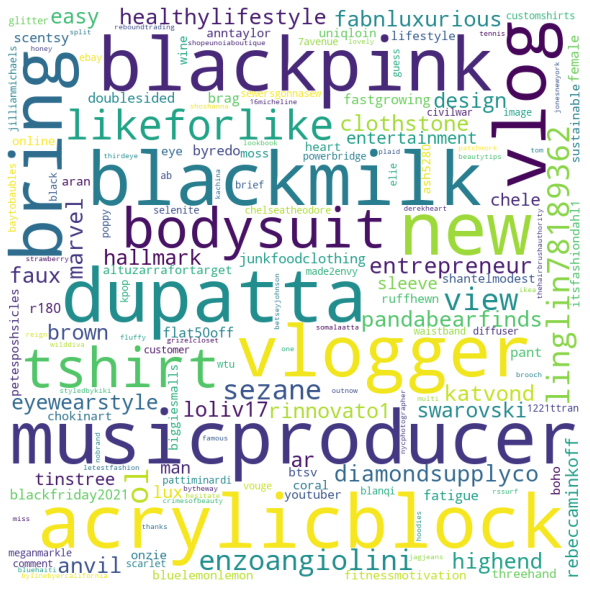

In [119]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [120]:
tweet_data.to_csv('Clean_Twitter_data.csv')